# Lab 3: Iterative Algorithm Design
## Dominic Zagra, Evan Schubert, Zach Wentz


### Algorithm Implementation
In the cell below, we implement our algorithm to determine if a point is inside a polygon. **<u>We assume that if a point is directly on one of the sides of a polygon then it is considered outside of the polygon.</u>**

In [2]:
def point_inside(vertices, classification_point):
    """
    Determines if the classification point is in the polygon. If the classification point is directly on one of the sides of the polygon, then it is considered to be outside of the polygon.
        
    Parameters:
        vertices (Tuple): Vertices of the polygon.
        classification_point (Tuple): 2D point to determine if it's in the polygon.
    
    Returns: Whether the classification point is in the polygon or not (true if it is, false if it is not).
    """
    num_hits = 0
    classification_x, classification_y = classification_point

    for i in range(len(vertices)):
        vertex_X1, vertex_Y1 = vertices[i]
        vertex_X2, vertex_Y2 = vertices[(i+1) % len(vertices)]

        if (classification_y > min(vertex_Y1, vertex_Y2) and classification_y <= max(vertex_Y1, vertex_Y2)):  
            if (vertex_X1 != vertex_X2):
                slope = (vertex_Y2 - vertex_Y1) / (vertex_X2 - vertex_X1)
                intercept = vertex_Y2 - (slope * vertex_X2)
                
                on_line_x = (classification_y - intercept) / slope

            else:
                on_line_x = vertex_X2
                
            if (on_line_x > classification_x):
                    num_hits += 1
            
    if (num_hits % 2 == 0):
        return False
    else:
        return True

In the cell below, we create test cases for our algorithm to ensure it works as intended.

In [3]:
def test_algo():
    # testing for a square, with point outside of it
    square_vertices = ((1,1), (1,2), (2,2), (2,1))
    classification_point = ((2,3))
    assert point_inside(square_vertices, classification_point) == False

    # testing for a square, with point inside of it
    classification_point_2 = ((1.5, 1.5))
    assert point_inside(square_vertices, classification_point_2) == True
    
    #testing for a triangle, with point outside of it
    triangle_vertices = ((1,1), (1.5,2), (2,1))
    classification_point_3 = ((1,2))
    assert point_inside(triangle_vertices, classification_point_3) == False

    #testing for a triangle, with point inside of it
    classification_point_4 = ((1.5, 1.5))
    assert point_inside(triangle_vertices, classification_point_4) == True

    #testing for a triangle, with a point (0,1)
    classification_point_5 = ((0,1))
    assert point_inside(triangle_vertices, classification_point_5) == False

    #test
    triangle_vertices = ((1, 1), (1, 3), (2, 2))
    classification_point_6 = ((1.5, 2))
    assert point_inside(triangle_vertices, classification_point_6) == True

    #test point outside upside down pentagon (horizontal line hits lower tip of pentagon)
    pentagon_vertices = ((3, 0), (2, 1), (2, 3), (4, 3), (4, 1))
    classification_point_7 = ((0, 0))
    assert point_inside(pentagon_vertices, classification_point_7) == False

    #test point inside complex shape (horizontal line hits one side of the shape)
    complex_shape_vertices = ((1, 1), (1, 4), (6, 4), (6, 3), (4, 3), (2, 1))
    classification_point_8 = ((3, 3))
    assert point_inside(complex_shape_vertices, classification_point_8) == True


Next, we call the test method defined above to run the tests we created.

In [4]:
test_algo()

## Test Cases


| Test Case                               | Expected Answer     | Algo Returned Answer |
| ------------------------------------------------ | ------------------- | -------------------- |
| <img src="TestCase1.png" width="400" height="300">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase2.png" width="400" height="300">            | True (Point in polygon)| True (Point in polygon)                |
| <img src="TestCase3.png" width="400" height="300">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase4.png" width="400" height="300">            | True (Point in polygon)| True (Point in polygon)                |
| <img src="TestCase5.png" width="400" height="300">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase6.png" width="250">            | True (Point in polygon)| True (Point in polygon)                |
| <img src="TestCase7.png" width="400" height="300">            | False (Point not in polygon)| False (Point not in polygon)                |
| <img src="TestCase8.png" width="400" height="300">            | True (Point in polygon)| True (Point in polygon)                |



## Benchmarking

The following cell installs a library needed to generate polygons.

In [9]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\wentzz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


The following cell contains functions that are needed for benchmarking. It contains functions that specifically generate vertices of a polygon (for n amount of sides), generate the classification point, as well as a function that calculates the time needed to run our algorithm for a polygon with n amonut of vertices.

In [10]:
from shapely import Point
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
import time
import random

def generate_vertices(center_x, center_y, radius, n_sides):
    polygon = Point(center_x, center_y).buffer(radius, n_sides)
    return list(polygon.exterior.coords)

def midpoint(vertex1, vertex2):
    return ((vertex1[0] + vertex2[0]) / 2, (vertex1[1] + vertex2[1]) / 2)


def generate_classification_point(vertices):
    choice = random.choice(['inside', 'outside', 'edge'])
    
    if choice == 'inside':
        return (0,0) #guaranteed to be inside since polygon generated is centered at (0,0)
    
    elif choice == 'outside':
        return (vertices[0][0] + 100 , vertices[0][1] + 100)
    
    elif choice == 'edge':
        return midpoint(vertices[1], vertices[2])

def benchmarker(center_x, center_y, radius, n_sides):
    vertices = generate_vertices(center_x, center_y, radius, n_sides) #generate n vertices
    classification_point = generate_classification_point(vertices)
    start_time = time.perf_counter()
    point_inside(vertices, classification_point)
    end_time = time.perf_counter()

    return end_time - start_time



The following cell runs the algorithm for polygons with sides ranging from 3 to 2000. These numbers were chosen as they resulted in meaningful benchmarking graph.

In [11]:
times = []
center_x, center_y = 0, 0
radius = 10

times = [benchmarker(center_x, center_y, radius, n) for n in range(3,2001)]

The following cell plots the run time of our algorithm againist the number of vertices passed into it.

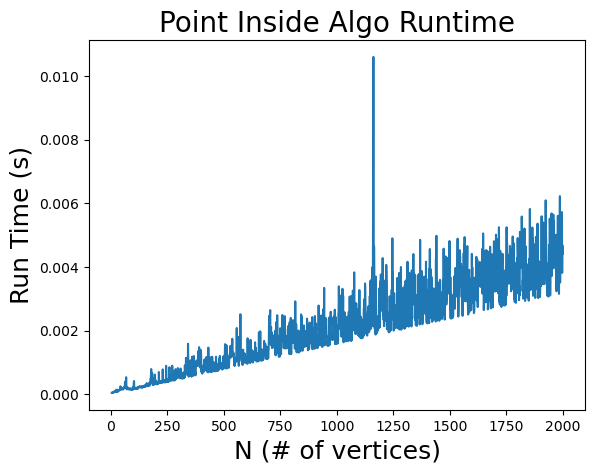

In [7]:
n = list(range(3,2001))
plt.plot(n, times)
plt.xlabel("N (# of vertices)", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Point Inside Algo Runtime", fontsize=20)
plt.ticklabel_format(style='plain')
plt.show()

| Algo           |Theoretical | Estimated |
|----------------|------------|-----------|
| Point Inside   | O(n)       | O(n)      |